<a href="https://colab.research.google.com/github/Maithraanand/Financial-Machine-Learning-FML-/blob/main/FML_TUTORIAL_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION OF EXPENCES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/CSV/TRANSACTION DETAILS.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance
0,02-Apr-23,02-Apr-23,TO TRANSFER-UPI/DR/309271356209/Jio Prep/PY...,TRANSFER TO 5098066162093,25,,"3,578.47"
1,04-Apr-23,04-Apr-23,TO TRANSFER-UPI/DR/309412758722/BIG SAVE/PY...,TRANSFER TO 5097622162091,20,,"3,558.47"
2,06-Apr-23,06-Apr-23,BY TRANSFER-UPI/CR/346283860454/GODFREY /KV...,TRANSFER FROM 4693405162091,,500,"4,058.47"
3,07-Apr-23,07-Apr-23,TO TRANSFER-UPI/DR/309701513472/YURISH F/PY...,TRANSFER TO 4692599162094,50,,"4,008.47"
4,07-Apr-23,07-Apr-23,TO TRANSFER-UPI/DR/309709093126/REESU MA/PY...,TRANSFER TO 4898749162094,45,,"3,963.47"


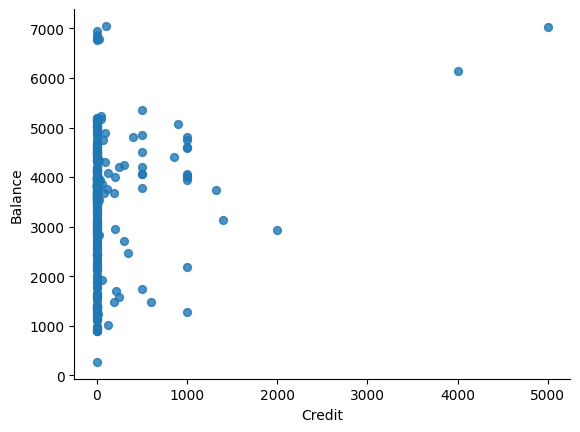

In [ ]:
# @title Credit vs Balance

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Credit', y='Balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

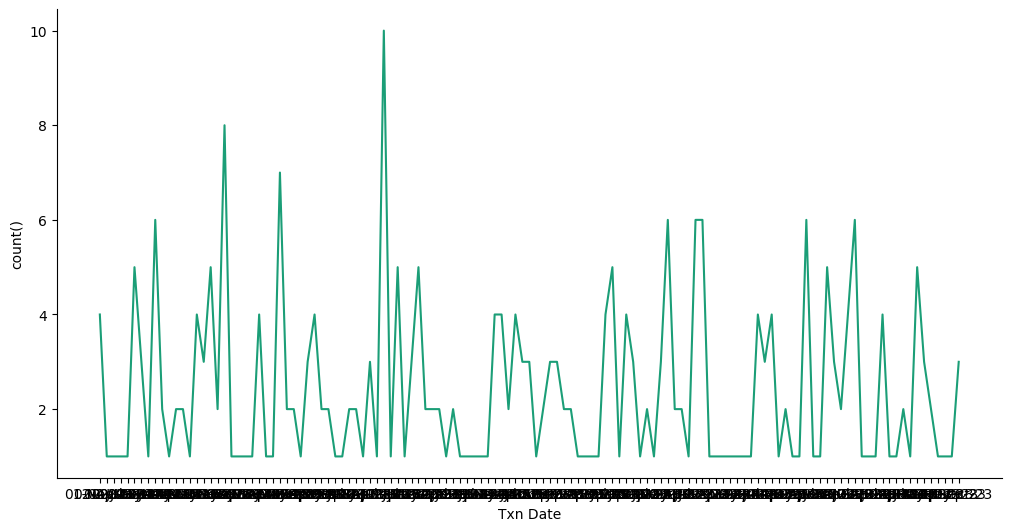

In [ ]:
# @title Txn Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Txn Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Txn Date'}, axis=1)
              .sort_values('Txn Date', ascending=True))
  xs = counted['Txn Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Txn Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Txn Date')
_ = plt.ylabel('count()')

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/CSV/TRANSACTION DETAILS.csv'
df = pd.read_csv(file_path)

# Inspect the column names
print(df.columns)

# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()

# Inspect the cleaned column names
print(df.columns)

# Drop rows where 'Txn Date' or 'Value Date' is NaN or contain non-date values
df = df.dropna(subset=['Txn Date', 'Value Date'])
df = df[df['Txn Date'].str.match(r'^\d{2}-\w{3}-\d{2}$')]
df = df[df['Value Date'].str.match(r'^\d{2}-\w{3}-\d{2}$')]

# Convert date columns to datetime format
df['Txn Date'] = pd.to_datetime(df['Txn Date'], format='%d-%b-%y')
df['Value Date'] = pd.to_datetime(df['Value Date'], format='%d-%b-%y')

# Remove commas from 'Debit', 'Credit', and 'Balance' columns and convert to numeric
df['Debit'] = pd.to_numeric(df['Debit'].str.replace(',', ''), errors='coerce')
df['Credit'] = pd.to_numeric(df['Credit'].str.replace(',', ''), errors='coerce')
df['Balance'] = pd.to_numeric(df['Balance'].str.replace(',', ''), errors='coerce')

# Fill missing values if any
df.fillna(0, inplace=True)

# Display the first few rows of the preprocessed dataframe
print(df.head())


Index(['Txn Date', 'Value Date', 'Description', 'Ref No./Cheque No.',
       '        Debit', 'Credit', 'Balance'],
      dtype='object')
Index(['Txn Date', 'Value Date', 'Description', 'Ref No./Cheque No.', 'Debit',
       'Credit', 'Balance'],
      dtype='object')
    Txn Date Value Date                                        Description  \
0 2023-04-02 2023-04-02     TO TRANSFER-UPI/DR/309271356209/Jio Prep/PY...   
1 2023-04-04 2023-04-04     TO TRANSFER-UPI/DR/309412758722/BIG SAVE/PY...   
2 2023-04-06 2023-04-06     BY TRANSFER-UPI/CR/346283860454/GODFREY /KV...   
3 2023-04-07 2023-04-07     TO TRANSFER-UPI/DR/309701513472/YURISH F/PY...   
4 2023-04-07 2023-04-07     TO TRANSFER-UPI/DR/309709093126/REESU MA/PY...   

            Ref No./Cheque No.  Debit  Credit  Balance  
0    TRANSFER TO 5098066162093   25.0     0.0  3578.47  
1    TRANSFER TO 5097622162091   20.0     0.0  3558.47  
2  TRANSFER FROM 4693405162091    0.0   500.0  4058.47  
3    TRANSFER TO 4692599162094   50

In [ ]:
# Feature Engineering
df['Day'] = df['Txn Date'].dt.day
df['Month'] = df['Txn Date'].dt.month
df['Year'] = df['Txn Date'].dt.year
df['DayOfWeek'] = df['Txn Date'].dt.dayofweek

# Determine if the transaction is a debit or credit
df['Amount'] = df['Debit'] - df['Credit']
df['TransactionType'] = df['Amount'].apply(lambda x: 'Debit' if x < 0 else 'Credit')

# Encode the TransactionType as binary
df['TransactionType'] = df['TransactionType'].map({'Debit': 1, 'Credit': 0})

# Display the first few rows of the feature-engineered dataframe
print(df.head())


    Txn Date Value Date                                        Description  \
0 2023-04-02 2023-04-02     TO TRANSFER-UPI/DR/309271356209/Jio Prep/PY...   
1 2023-04-04 2023-04-04     TO TRANSFER-UPI/DR/309412758722/BIG SAVE/PY...   
2 2023-04-06 2023-04-06     BY TRANSFER-UPI/CR/346283860454/GODFREY /KV...   
3 2023-04-07 2023-04-07     TO TRANSFER-UPI/DR/309701513472/YURISH F/PY...   
4 2023-04-07 2023-04-07     TO TRANSFER-UPI/DR/309709093126/REESU MA/PY...   

            Ref No./Cheque No.  Debit  Credit  Balance  Day  Month  Year  \
0    TRANSFER TO 5098066162093   25.0     0.0  3578.47    2      4  2023   
1    TRANSFER TO 5097622162091   20.0     0.0  3558.47    4      4  2023   
2  TRANSFER FROM 4693405162091    0.0   500.0  4058.47    6      4  2023   
3    TRANSFER TO 4692599162094   50.0     0.0  4008.47    7      4  2023   
4    TRANSFER TO 4898749162094   45.0     0.0  3963.47    7      4  2023   

   DayOfWeek  Amount  TransactionType  
0          6    25.0              

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'Amount']
target = 'TransactionType'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 5) (60, 5) (239,) (60,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy Score: {accuracy}')


Confusion Matrix:
[[42  0]
 [ 0 18]]
Accuracy Score: 1.0


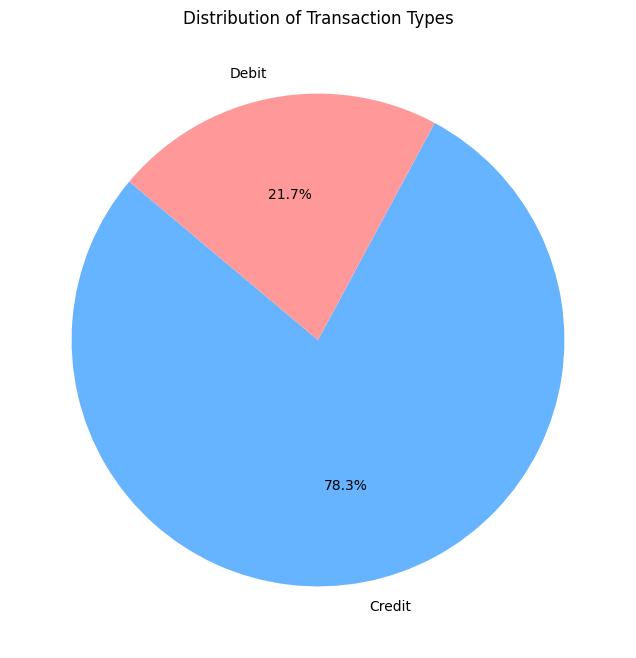

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each transaction type
transaction_type_counts = df['TransactionType'].value_counts()

# Map transaction types back to their labels
transaction_type_counts.index = ['Credit' if x == 0 else 'Debit' for x in transaction_type_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Transaction Types')
plt.show()

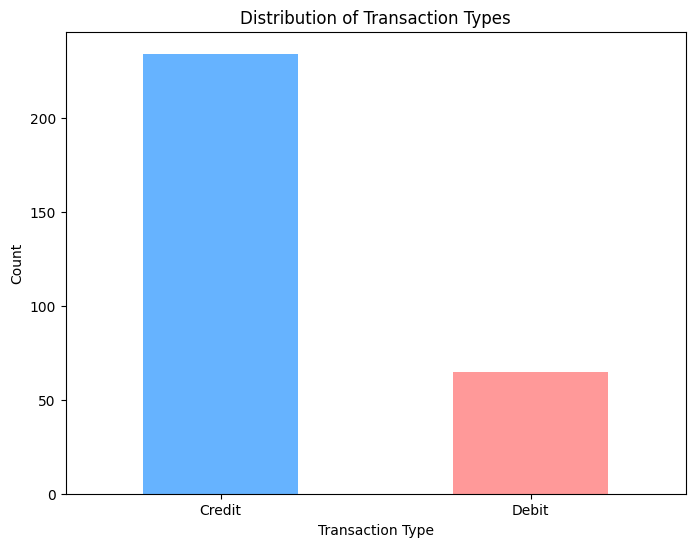

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame `df` has already been preprocessed as described earlier

# Count the occurrences of each transaction type
transaction_type_counts = df['TransactionType'].value_counts()

# Map transaction types back to their labels
transaction_type_counts.index = ['Credit' if x == 0 else 'Debit' for x in transaction_type_counts.index]

# Plot the bar graph
plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample descriptions for illustration purposes
sample_descriptions = [
    "Grocery Store Purchase",
    "Electricity Bill Payment",
    "Monthly Rent",
    "Salary Credit",
    "Online Shopping"
]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(sample_descriptions)

# Display the TF-IDF matrix
print(X.toarray())

[[0.         0.         0.         0.57735027 0.         0.
  0.         0.57735027 0.         0.         0.         0.57735027]
 [0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.70710678 0.
  0.         0.         0.70710678 0.         0.         0.        ]
 [0.         0.70710678 0.         0.         0.         0.
  0.         0.         0.         0.70710678 0.         0.        ]
 [0.         0.         0.         0.         0.         0.70710678
  0.         0.         0.         0.         0.70710678 0.        ]]


In [ ]:
# Create a 'Day' column to categorize transactions by day
df['Day'] = df['Txn Date'].dt.date

# Display the first few rows with the new 'Day' column
print(df[['Txn Date', 'Day']].head(10))


    Txn Date         Day
0 2023-04-02  2023-04-02
1 2023-04-04  2023-04-04
2 2023-04-06  2023-04-06
3 2023-04-07  2023-04-07
4 2023-04-07  2023-04-07
5 2023-04-07  2023-04-07
6 2023-04-07  2023-04-07
7 2023-04-08  2023-04-08
8 2023-04-10  2023-04-10
9 2023-04-12  2023-04-12


In [ ]:
# Define categories based on description patterns
categories = {
    'Grocery': ['grocery', 'supermarket'],
    'Utilities': ['bill', 'electricity', 'water'],
    'Rent': ['rent'],
    'Salary': ['salary', 'credit'],
    'Shopping': ['shopping', 'online']
}

# Function to categorize transactions
def categorize_transaction(description):
    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'Other'

# Apply the categorization function
df['Category'] = df['Description'].apply(categorize_transaction)

# Display the first few rows with categories
print(df[['Description', 'Category']].head())

                                         Description Category
0     TO TRANSFER-UPI/DR/309271356209/Jio Prep/PY...    Other
1     TO TRANSFER-UPI/DR/309412758722/BIG SAVE/PY...    Other
2     BY TRANSFER-UPI/CR/346283860454/GODFREY /KV...    Other
3     TO TRANSFER-UPI/DR/309701513472/YURISH F/PY...    Other
4     TO TRANSFER-UPI/DR/309709093126/REESU MA/PY...    Other


In [ ]:
# Group by day and category, then count the number of transactions
daily_category_counts = df.groupby(['Day', 'Category']).size().unstack(fill_value=0)

# Display the first few rows of the daily category counts
print(daily_category_counts.head(30))

Category    Other  Salary  Utilities
Day                                 
2023-04-02      1       0          0
2023-04-04      1       0          0
2023-04-06      1       0          0
2023-04-07      4       0          0
2023-04-08      1       0          0
2023-04-10      1       0          0
2023-04-12      2       0          0
2023-04-17      1       0          0
2023-04-21      2       0          0
2023-04-22      1       0          0
2023-04-23      1       0          0
2023-04-24      4       0          0
2023-04-25      1       0          0
2023-04-26      3       0          0
2023-04-27      1       0          0
2023-04-28      1       0          0
2023-04-30      2       0          0
2023-05-02      1       0          0
2023-05-04      2       0          0
2023-05-05      3       0          0
2023-05-07      1       0          0
2023-05-08      3       0          0
2023-05-09      1       0          0
2023-05-11      1       0          0
2023-05-13      1       0          0
2

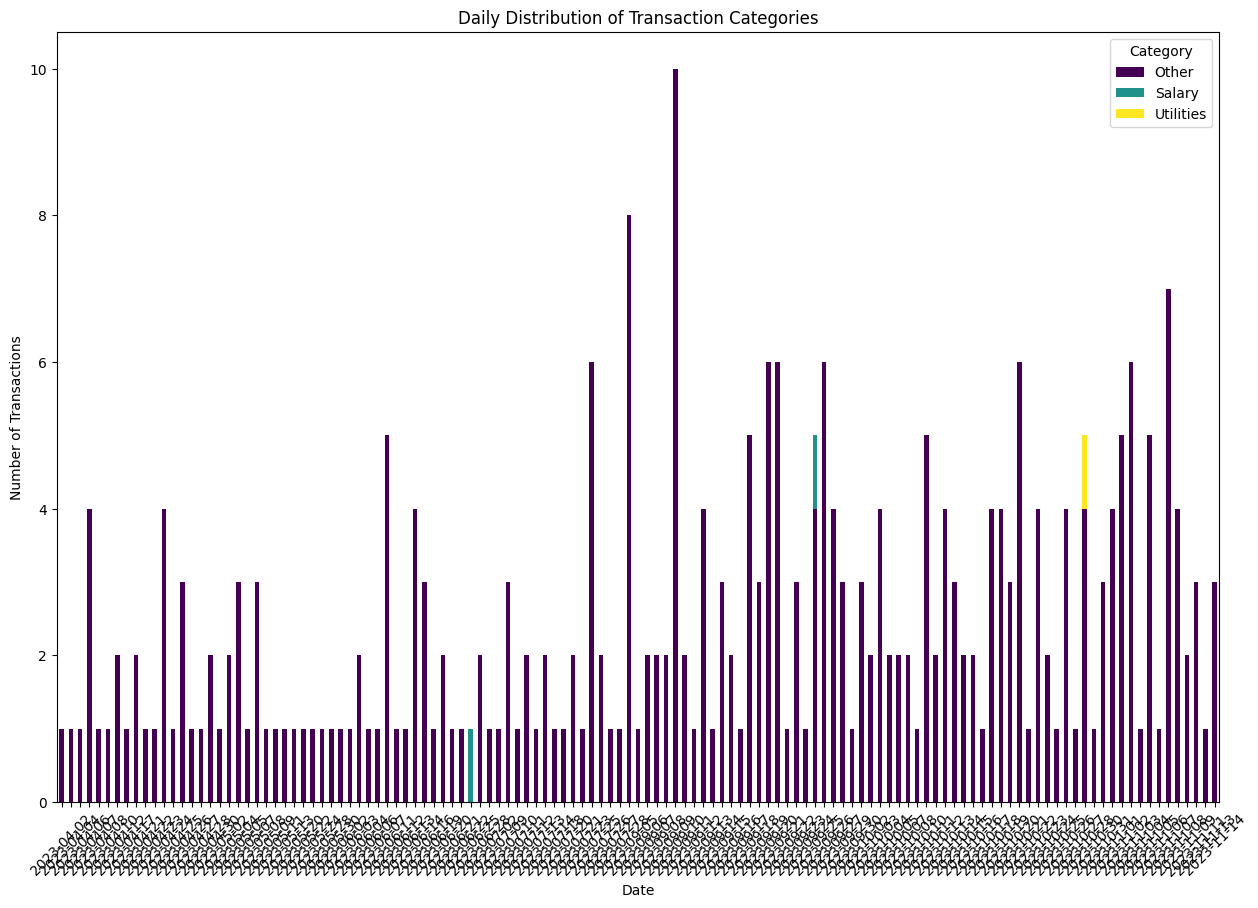

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar graph for each day
daily_category_counts.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Distribution of Transaction Categories')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()
